# <center><u>Distribuição Normal de uma Amostra</u></center>
<center>Análise Exploratória</center>

Uma loja "A" teve uma distribuição de visita de clientes durante um período de 60 dias. Qual a distribuição da visita destes clientes durante este período? <br>
E se colocarmos duas 2 lojas A e B? Qual a distribuição é a distribuição e as análises que podemos fazer?

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

# Mostrar os gráficos no arquivo: Quando colocamos o inline nãão conseguimos alterar o tamanho do grafico
%matplotlib inline

In [2]:
# Criar o DataFrame com base no arquivo Excel
df_clientes1 = pd.read_csv('clientes1.csv', sep=';',encoding='cp1252')

#Exibindo as 5 primeiras linhas do DataFrame
df_clientes1.head()

,Unnamed: 0,Qtd de Clientes,Unnamed: 2
0,Dia,Loja A,Loja B
1,1,57,109
2,2,55,112
3,3,90,77
4,4,76,70


In [3]:
#Exibindo as 5 últimas linhas do DataFrame
df_clientes1.tail()

,Unnamed: 0,Qtd de Clientes,Unnamed: 2
57,57,72,101
58,58,71,99
59,59,85,98
60,60,70,72
61,NaN,NaN,NaN


In [4]:
# Acertando a 1 linha 
#Vamos mudar o nome das colunas usando a primeira linha
df_clientes1.columns = df_clientes1.iloc[0]
#Exibindo as 5 primeiras linhas do DataFrame
df_clientes1.head()

,Dia,Loja A,Loja B
0,Dia,Loja A,Loja B
1,1,57,109
2,2,55,112
3,3,90,77
4,4,76,70


In [5]:
#Apagando a primeira linha neste arquivo
df_clientes1.drop(df_clientes1.index[0], inplace=True)
# Mostrar as 5 primeiras linhas da tabela
df_clientes1.head()

,Dia,Loja A,Loja B
1,1,57,109
2,2,55,112
3,3,90,77
4,4,76,70
5,5,58,96


In [6]:
df_clientes2 = df_clientes1.dropna()
df_clientes2

,Dia,Loja A,Loja B
1,1,57,109
2,2,55,112
3,3,90,77
4,4,76,70
5,5,58,96
6,6,73,112
7,7,75,120
8,8,71,113
9,9,45,81
10,10,65,101


In [7]:
df_clientes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 3 columns):
Dia       60 non-null object
Loja A    60 non-null object
Loja B    60 non-null object
dtypes: object(3)
memory usage: 1.9+ KB


In [8]:
# Alterando os dados das colunas Loja A e Loja B para int
df_clientes2['Loja A'] = df_clientes2['Loja A'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df_clientes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 3 columns):
Dia       60 non-null object
Loja A    60 non-null int32
Loja B    60 non-null object
dtypes: int32(1), object(2)
memory usage: 1.6+ KB


In [10]:
# Alterando os dados das colunas Loja A e Loja B para int
df_clientes2['Loja B'] = df_clientes2['Loja B'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df_clientes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 3 columns):
Dia       60 non-null object
Loja A    60 non-null int32
Loja B    60 non-null int32
dtypes: int32(2), object(1)
memory usage: 1.4+ KB


In [12]:
# Alterando os dados das coluna Dia para int
df_clientes2['Dia'] = df_clientes2['Dia'].astype(int)
df_clientes2.info()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 3 columns):
Dia       60 non-null int32
Loja A    60 non-null int32
Loja B    60 non-null int32
dtypes: int32(3)
memory usage: 1.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


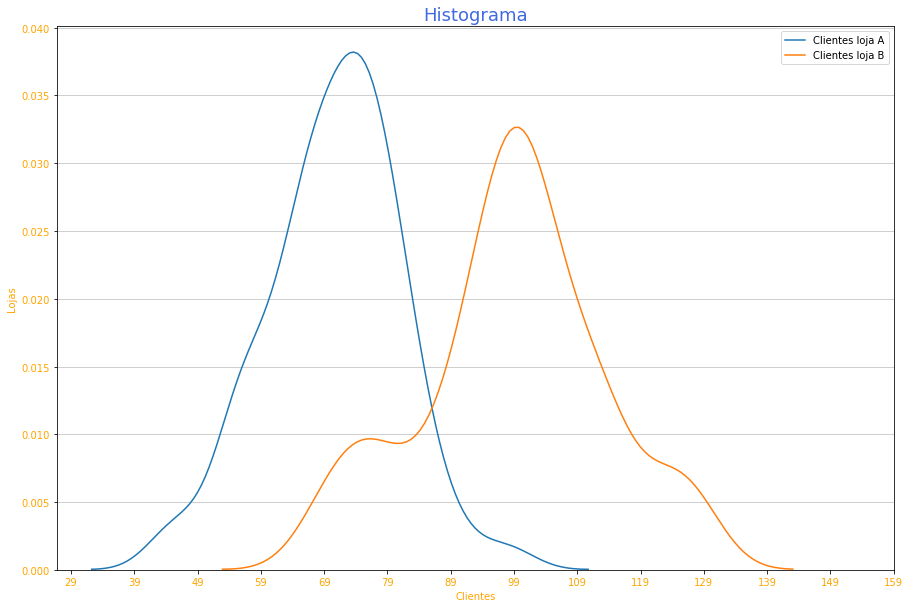

In [13]:
# Histograma
f, axes = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
sns.distplot(df_clientes2["Loja A"], kde= True, rug=False, hist=False, bins='auto', vertical=False, label = "Clientes loja A")
sns.distplot(df_clientes2["Loja B"], kde= True, rug=False, hist=False, bins='auto', vertical=False, label = "Clientes loja B")
plt.grid(axis='y', alpha=0.75)
plt.title('Histograma', fontsize=18, color='royalblue')
plt.xticks(np.arange(29,160,10), color='orange')
plt.yticks (color='orange')
plt.xlabel('Clientes',color='orange')
plt.ylabel('Lojas',color='orange')
plt.legend()
plt.show()

## Conclusão:
Podemos ver que a base do gráfico da Loja B é mais espalhado, então a variabilidade é maior da Loja "B" do que a Loja "A".<br>
Assim a quantidade de clientes que chegam no dia a dia, variam mais na Loja "B" do que na Loja "A".